# WORLD HAPPINESS REPORT 2019 - EDA
Dateset: *https://www.kaggle.com/datasets/unsdsn/world-happiness* (Kaggle) 

**By: Taufik Achmad Septian**

---

## IMPORT LIBRARIES AND LOAD DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Create happiness dataframe from the dataset
happiness = pd.read_csv('World_Happiness_Report_2019.csv')

# View the first 5 rows from the dataframe
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


---
## BASIC INFORMATION ABOUT THE DATASET

#### The Dataset Shape

In [3]:
# View the shape from the dataframe
happiness.shape

(156, 9)

The data has 156 rows, where each row represents [representing](https://worldhappiness.report/ed/2019/) a country and its happiness index score.

#### The Dataset Summary 

In [4]:
# Basic information about the dataframe, including the columns, number of NULL (if exists) and the data type for each columns
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Looking at the basic information about the data, it looks like the data is pretty clean. This is shown by the fact that there are 156 rows in the data and there is no NULL value across its 9 columns. The only thing that needs to be changed is the `Overall rank`, it should be presented as qualitative data because there is no use in aggregating this column for the analysis. Also, capitalizing the countries' names for visualization purposes could also be done.

In [5]:
# Change the Overall rank data type to string
happiness['Overall rank'] = happiness['Overall rank'].astype('str')

In [6]:
# Confirm change
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    object 
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.1+ KB


In [7]:
# Capitalize the country or region name for visualization purpose
happiness['Country or region'] = happiness['Country or region'].str.upper()
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,FINLAND,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,DENMARK,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,NORWAY,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,ICELAND,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,NETHERLANDS,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### The Decsriptive Statistics From the Dataset

In [8]:
# Descriptive statistics from quantitative data in the dataframe
happiness.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


---
## ANALYSIS

#### Happiness Variable

There are six [variables](https://www.trackinghappiness.com/happiness-index-2018/) that are the key to measuring the happiness of a country. 

They are:
1. **GDP per Capita**: Represent the GDP per capita level of a country. Can also mean the country’s level of wealth. 
2. **Social Support**: Represent the satisfaction level of having relatives or friends that can be counted on when needed.
3. **Healthy Life Expectancy**: Represent the average number of “healthy” years a child at birth is estimated to live.
4. **Freedom to Make Life Choices**: Represent the satisfaction level of the population's freedom to choose what to do with their life
5. **Generosity**: Represent the willingness level of people on helping each other.
6. **Perceptions of Corruption**: The measure of how people think about how corruption in the country is. Can also mean the level of trust in business and government.

#### Happiness Variable Box Plot 

Box plot could show if there are certain variables that possibly represent the overall condition of world happiness.

In [9]:
cols = ['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption',]

# Unpivot or melt the dataframe
df_melt = pd.melt(happiness, id_vars=['Country or region'], 
                  value_vars=cols, 
                  var_name='variable', 
                  value_name='point')

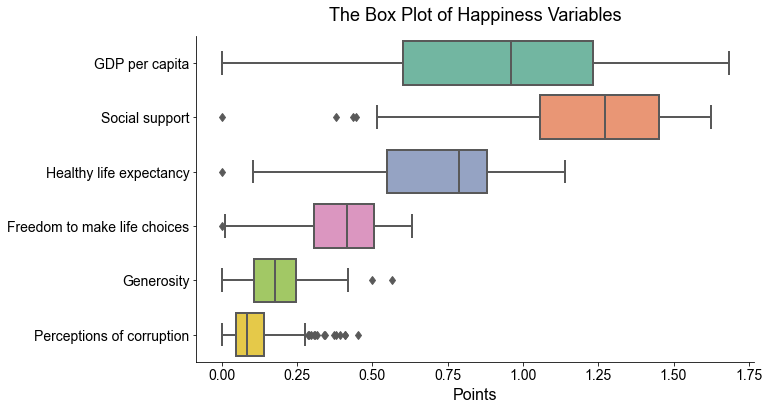

In [10]:
# Set the figure width and height
plt.figure(figsize = (10,6))

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.boxplot(x='point', y='variable', data=df_melt, linewidth=2, fliersize=6, palette='Set2')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title('The Box Plot of Happiness Variables', fontsize = 18, pad=15)
ax.tick_params(labelsize=14)
ax.set_xlabel("Points", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

# Show the plot
plt.show()

The graph shows that even though some variables have outliers, those outliers are representing a condition of a country. But, the `Perceptions of corruption` variable has the most outliers among all variables. Those outliers represent the countries with **high trust** in the goverment/business or simply has lower corruption level. This means, that corruption is still a major problem in most of the world.

#### How Score Variable Measured?

The score variable is not measured by just adding each of the factors that made a country happy or not. 

In [11]:
# Inspiration https://www.kaggle.com/code/lostinworlds/analysing-the-happiness-index-dataset-2019/notebook

happiness["Check"] = happiness[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis = 1)

happiness[happiness['Check'] != happiness['Score']].any()

Overall rank                    True
Country or region               True
Score                           True
GDP per capita                  True
Social support                  True
Healthy life expectancy         True
Freedom to make life choices    True
Generosity                      True
Perceptions of corruption       True
Check                           True
dtype: bool

In [12]:
happiness[['Check', 'Score']].sample(5)

,Check,Score
88,2.895,5.208
96,3.816,5.011
83,3.679,5.274
155,1.479,2.853
152,2.700,3.231


In [13]:
happiness.drop("Check", axis=1, inplace=True)

#### Score Variable Distribution

As the most crucial part to determine the level of happiness in a country, the `score` measurements should get more attention here. First, let's look at how the values are distributed.

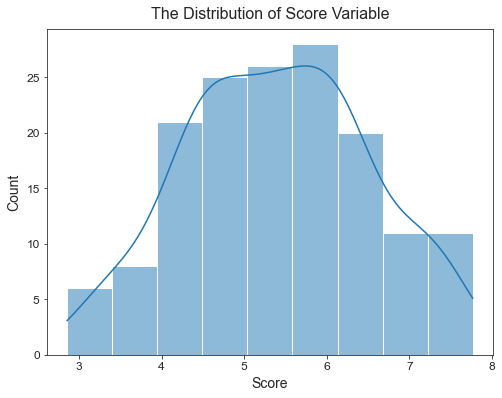

In [14]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Plot the distribution of the score measurement
ax = sns.histplot(happiness['Score'], kde=True)

# Set the title, the labels, and custom ticks
plt.title('The Distribution of Score Variable', fontsize = 16, pad=10)
ax.set_xlabel("Score", fontsize=14, labelpad=5)
ax.set_ylabel("Count", fontsize=14, labelpad=5)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

From the visual above, the `score` variable has quite bell-shaped graph and the values are mostly laid near the mean value, which is **5.41**

In [15]:
# Check the mean, median, mode of the Score variable
score_mean = round(happiness['Score'].mean(), 2)
score_median = round(happiness['Score'].median(), 2)
score_mode = round(happiness['Score'].mode()[0] , 2)

# Print the result
print('Score variable central tendency calculation"')
print('Mean    : {}\nMedian  : {}\nMode    : {}'. format(score_mean, score_median, score_mode))

Score variable central tendency calculation"
Mean    : 5.41
Median  : 5.38
Mode    : 5.21


The central tendency calculation from the `Score` variables also shows that the graph would have a bell-shaped curve, and the mean can be used as the central tendency from the variable.

#### Correlation Between Happiness Variables

Is it possible from the six variables that determine the happiness level of a country, that there is a certain variable that highly affects it? Let's find out about it.

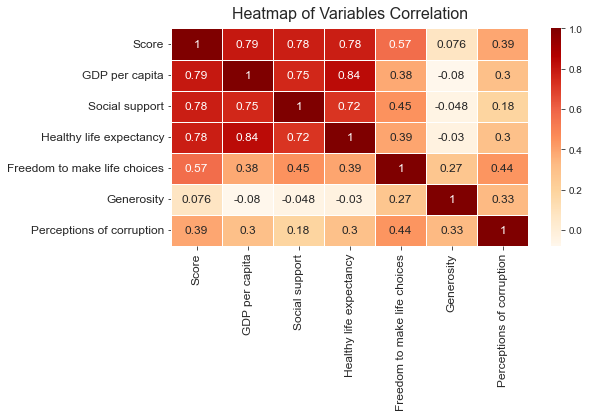

In [16]:
# Get the correlation between variables in the dataframe
corr = happiness.corr()

# Set the figure width and height
plt.figure(figsize = (8,4))

# Set the color to use for the heatmap
cmap = sns.color_palette("OrRd", as_cmap=True)

# Plot the heatmap of correlation between variables in the dataframe
ax = sns.heatmap(corr, cbar=True, annot=True, annot_kws={"size":12}, cmap=cmap, linewidths=1, linecolor='white')

# Set the title, the labels, and custom ticks
plt.title('Heatmap of Variables Correlation', fontsize = 16, pad=10)
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

It looks like **GDP per Capita**, **Social Support**, and **Healthy life Expectancy** have the greatest correlation with the happiness score each country made, which are above **0.75**.

#### World Happiest Countries in 2019

Which countries are belong to the happiest countries based on this data? Let's see the top 10 of them.

In [17]:
# Top 10 happiest countries
happy_10 = happiness[['Country or region', 'Score']].head(10)

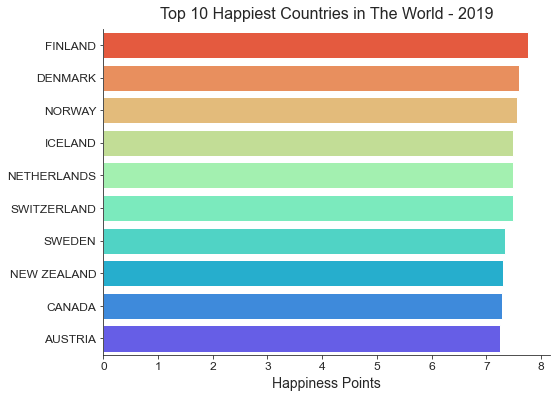

In [18]:
plt.figure(figsize = (8,6)) # Set the figure width and height

# Bar chart showing top 20 countries with highest contribution of GDP per capita on Hapiness level
ax = sns.barplot(x='Score', y='Country or region', data=happy_10, palette='rainbow_r')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Happiest Countries in The World - 2019", fontsize = 16, pad=10)
ax.set_xlabel("Happiness Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In 2019, **Finland**, **Denmark**, **Norway**, **Iceland**, and **Sweden** that also known as the [Nordic countries](https://en.wikipedia.org/wiki/Nordic_countries), dominated the list. Let's analyze how Nordic countries were able to secure the top 10 spots. Let's start with finding variables that highly affected their happiness score.

In [19]:
# Create a new dataframe for Nordic countries
country = ['finland', 'denmark', 'norway', 'iceland', 'sweden']
nordic = happiness[happiness['Country or region'].str.lower().isin(country)]
nordic

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,FINLAND,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,DENMARK,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,NORWAY,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,ICELAND,7.494,1.380,1.624,1.026,0.591,0.354,0.118
6,7,SWEDEN,7.343,1.387,1.487,1.009,0.574,0.267,0.373


#### GDP per Capita and Happiness

First, let's find the countries with the highest GDP per capita points in 2019.

In [20]:
# List the top 10 countries with highest GDP per capita points
gdp_10 = happiness.sort_values(by='GDP per capita', ascending=False)[['Country or region', 'GDP per capita', 'Overall rank']].head(10)

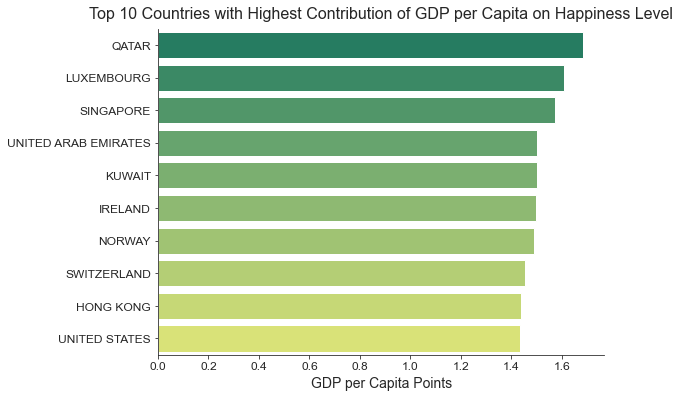

In [21]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of GDP per capita on happiness level
ax = sns.barplot(x='GDP per capita', y='Country or region', data=gdp_10, palette='summer')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of GDP per Capita on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("GDP per Capita Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

From the GDP per capita variable, it doesn't look like this is a bigger deal in determining the Nordic countries' happiness level. From this list, only **Norway** is included in this list.

In [22]:
# Check the country that also Nordic countries
gdp_10[gdp_10['Country or region'].isin(nordic['Country or region'])].reset_index(drop=True)

,Country or region,GDP per capita,Overall rank
0,NORWAY,1.488,3


Making the list larger reveals other Nordic countries, which are **Sweden**, **Denmark** and **Iceland**. So, it's clear that GDP per capita is not the main variable of Nordic countries' happiness. But, this does not simply deny the fact that they already have slightly higher GDP per capita than other countries.

In [23]:
# List the top 20 countries with highest GDP per capita points
gdp_20 = happiness.sort_values(by='GDP per capita', ascending=False).reset_index(drop=True)[['Country or region', 'GDP per capita', 'Overall rank']].head(20)

# Find the position of Nordic countries in the list
gdp_20['Nordic'] = np.where(gdp_20['Country or region'].isin(nordic['Country or region']), True, False)
gdp_20

,Country or region,GDP per capita,Overall rank,Nordic
0,QATAR,1.684,29,False
1,LUXEMBOURG,1.609,14,False
2,SINGAPORE,1.572,34,False
3,UNITED ARAB EMIRATES,1.503,21,False
4,KUWAIT,1.500,51,False
5,IRELAND,1.499,16,False
6,NORWAY,1.488,3,True
7,SWITZERLAND,1.452,6,False
8,HONG KONG,1.438,76,False
9,UNITED STATES,1.433,19,False


#### Social Support and Happiness

In [24]:
# List the top 10 countries with highest social support points
social_10 = happiness.sort_values(by='Social support', ascending=False)[['Country or region', 'Social support', 'Overall rank']].head(10)

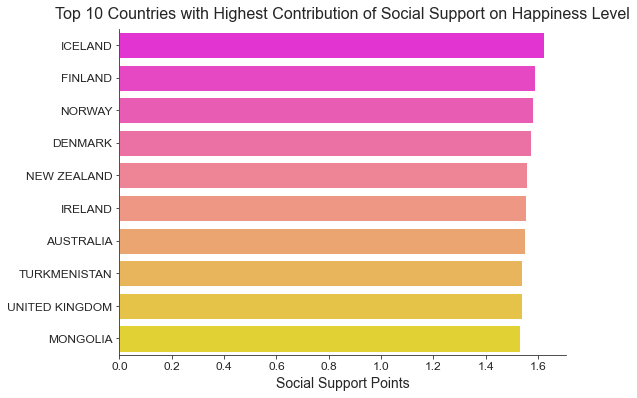

In [25]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of social support on happiness level
ax = sns.barplot(x='Social support', y='Country or region', data=social_10, palette='spring')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Social Support on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Social Support Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [26]:
# Check the country that also Nordic countries
social_10[social_10['Country or region'].isin(nordic['Country or region'])].reset_index(drop=True)

,Country or region,Social support,Overall rank
0,ICELAND,1.624,4
1,FINLAND,1.587,1
2,NORWAY,1.582,3
3,DENMARK,1.573,2


It looks like `social support` is the highest contributor to the Nordic countries' overall happiness level. 
**4/5** Nordic countries have higher `social support` points than every country in the world.
>*The support between citizens and state support programs for those in need in the Nordics countries is the [secret](https://time.com/collection/guide-to-happiness/4706590/scandinavia-world-happiness-report-nordics/) behind it.*

#### Healthy Life Expectancy and Happiness

In [27]:
# Is high life expectancy make a happy country?
life_10 = happiness.sort_values(by='Healthy life expectancy', ascending=False)[['Country or region', 'Healthy life expectancy', 'Overall rank']].head(10)

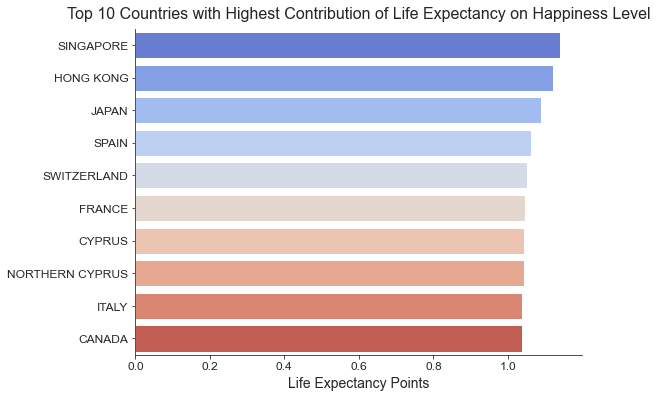

In [28]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of healthy life expectancy on happiness level
ax = sns.barplot(x='Healthy life expectancy', y='Country or region', data=life_10, palette='coolwarm')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Life Expectancy on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Life Expectancy Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [29]:
# Check the country that also Nordic countries
life_10[life_10['Country or region'].isin(nordic['Country or region'])].reset_index(drop=True)

,Country or region,Healthy life expectancy,Overall rank


Just like the GDP per capita case, even though these two variables have a great correlation with the score variable, this is not the case for the Nordic countries. Even if the list of countries with the highest contribution of life expectancy score is made to include the top 20 countries, only **3/5** of Nordic countries are on the list.

In [30]:
# List the top 20 countries with highest Healthy life expectancy points
life_20 = happiness.sort_values(by='Healthy life expectancy', ascending=False).reset_index(drop=True)[['Country or region', 'Healthy life expectancy', 'Overall rank']].head(20)

# Find the position of Nordic countries in the list
life_20['Nordic'] = np.where(life_20['Country or region'].isin(nordic['Country or region']), True, False)
life_20

,Country or region,Healthy life expectancy,Overall rank,Nordic
0,SINGAPORE,1.141,34,False
1,HONG KONG,1.122,76,False
2,JAPAN,1.088,58,False
3,SPAIN,1.062,30,False
4,SWITZERLAND,1.052,6,False
5,FRANCE,1.045,24,False
6,CYPRUS,1.042,49,False
7,NORTHERN CYPRUS,1.042,64,False
8,ITALY,1.039,36,False
9,CANADA,1.039,9,False


Of the three variables, which are `GDP per capita`, `Life support`, and `Healthy life expectancy, that have the greatest correlation to the happiness score, only `Life support` has the highest influence on Nordic countries' overall happiness. 

How about the other variables with a lower correlation to the happiness score, which is `Freedom to make life choices`, `Generosity`, and `Perceptions of corruption`?

#### Freedom to Make Life Choices and Happiness

In [31]:
# List the top 10 countries with highest freedom to make life choices points
freedom_10 = happiness.sort_values(by='Freedom to make life choices', ascending=False)[['Country or region', 'Freedom to make life choices', 'Overall rank']].head(10)

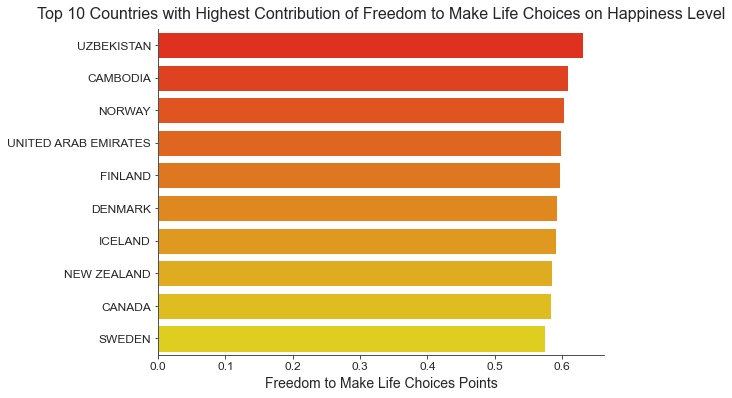

In [32]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of freedom to make life choices on happiness level
ax = sns.barplot(x='Freedom to make life choices', y='Country or region', data=freedom_10, palette='autumn')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Freedom to Make Life Choices on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Freedom to Make Life Choices Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [33]:
# Check the country that also Nordic countries
freedom_10[freedom_10['Country or region'].isin(nordic['Country or region'])].reset_index(drop=True)

,Country or region,Freedom to make life choices,Overall rank
0,NORWAY,0.603,3
1,FINLAND,0.596,1
2,DENMARK,0.592,2
3,ICELAND,0.591,4
4,SWEDEN,0.574,7


Even though `Freedom to make life choices` has a lower correlation to the happiness score, this variable has a high influence on Nordic countries' happiness scores. This is proved by the fact that every Nordic country is listed in the top 10 countries with the highest `freedom to make life choices score list.

> *The Nordic countries [constitute](https://time.com/collection/guide-to-happiness/4706590/scandinavia-world-happiness-report-nordics/) “the leading example of successful modernization, maximizing prosperity, social solidarity, and political and personal freedom."*

#### Generosity and Happiness

In [34]:
# List the top 10 countries with highest generosity points
generosity_10 = happiness.sort_values(by='Generosity', ascending=False)[['Country or region', 'Generosity', 'Overall rank']].head(10)

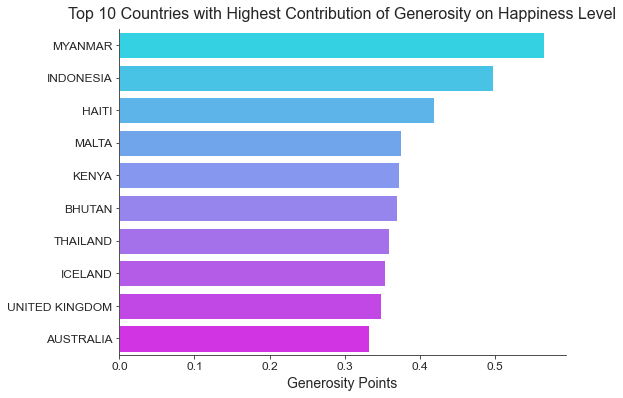

In [35]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of generosity on happiness level
ax = sns.barplot(x='Generosity', y='Country or region', data=generosity_10, palette='cool')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Generosity on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Generosity Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [36]:
# Check the country that also Nordic countries
generosity_10[generosity_10['Country or region'].isin(nordic['Country or region'])].reset_index(drop=True)

,Country or region,Generosity,Overall rank
0,ICELAND,0.354,4


`Generosity` does not have a meaningful meaning in Nordic countries' happiness scores. Even when the list changed to the top 20 countries with the highest Generosity score, still only **Iceland** that included in it.

In [37]:
# List the top 20 countries with highest generosity points
generosity_20 = happiness.sort_values(by='Generosity', ascending=False).reset_index(drop=True)[['Country or region', 'Generosity', 'Overall rank']].head(20)

# Find the position of Nordic countries in the list
generosity_20['Nordic'] = np.where(generosity_20['Country or region'].isin(nordic['Country or region']), True, False)
generosity_20

,Country or region,Generosity,Overall rank,Nordic
0,MYANMAR,0.566,131,False
1,INDONESIA,0.498,92,False
2,HAITI,0.419,147,False
3,MALTA,0.375,22,False
4,KENYA,0.372,121,False
5,BHUTAN,0.370,95,False
6,THAILAND,0.359,52,False
7,ICELAND,0.354,4,True
8,UNITED KINGDOM,0.348,15,False
9,AUSTRALIA,0.332,11,False


#### Perceptions of Corruption and Happiness

In [38]:
# List the top 10 countries with highest perceptions of corruption points
corrupt_10 = happiness.sort_values(by='Perceptions of corruption', ascending=False)[['Country or region', 'Perceptions of corruption', 'Overall rank']].head(10)

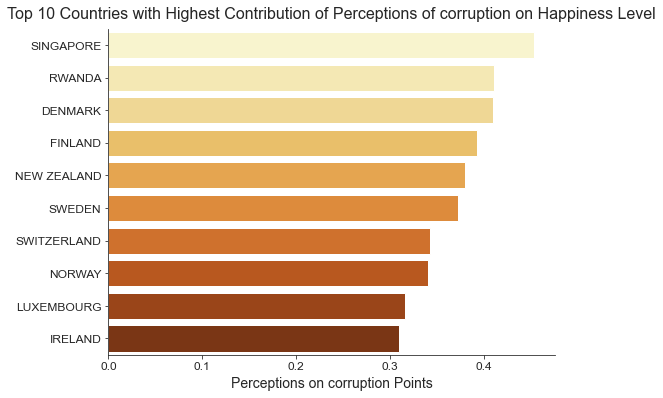

In [39]:
plt.figure(figsize = (8, 6)) # Set the figure width and height

# Bar chart showing top 10 countries with highest contribution of perceptions of corruption on happiness level
ax = sns.barplot(x='Perceptions of corruption', y='Country or region', data=corrupt_10, palette='YlOrBr')

# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, and custom ticks
plt.title("Top 10 Countries with Highest Contribution of Perceptions of corruption on Happiness Level", fontsize = 16, pad=10)
ax.set_xlabel("Perceptions on corruption Points", fontsize=14, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=12)

# Show the plot
plt.show()

In [40]:
# Check the country that also Nordic countries
corrupt_10[corrupt_10['Country or region'].isin(nordic['Country or region'])].reset_index(drop=True)

,Country or region,Perceptions of corruption,Overall rank
0,DENMARK,0.410,2
1,FINLAND,0.393,1
2,SWEDEN,0.373,7
3,NORWAY,0.341,3


`Perceptions of corruption` looks have a high influence on Nordic countries. After all, **4 of 5** Nordic countries are also listed here. Even though **Iceland** has lower points in these variables, they still got higher points than other Nordics countries in the `generoristy` variable.

In [41]:
# List the top 20 countries with highest Perceptions of corruption points
corrupt_20 = happiness.sort_values(by='Perceptions of corruption', ascending=False).reset_index(drop=True)[['Country or region', 'Perceptions of corruption', 'Overall rank']].head(20)
# Find the position of Nordic countries in the list
corrupt_20['Nordic'] = np.where(corrupt_20['Country or region'].isin(nordic['Country or region']), True, False)

#### Nordic Countries vs The World

In [42]:
# The Nordic countries average
col = ['GDP per capita',
       'Social support', 
       'Healthy life expectancy',
       'Freedom to make life choices', 
       'Generosity',
       'Perceptions of corruption',]
nordic_df = pd.DataFrame(nordic[col].mean(axis=0))
nordic_df = nordic_df.T    # Transpose the dataframe
nordic_df.insert(0, 'Country or region', 'Nordic Countries (avg)')

In [43]:
# The world average
world_df = pd.DataFrame(happiness[col].mean(axis=0))
world_df = world_df.T    # Transpose the dataframe
world_df.insert(0, 'Country or region', 'World (avg)')

In [44]:
# The world happiness variables average excluding Nordic countries
exclude_nordic = happiness[~happiness['Country or region'].isin(nordic['Country or region'])].reset_index(drop=True)
exclude_nordic = pd.DataFrame(exclude_nordic[col].mean(axis=0))
exclude_nordic = exclude_nordic.T    # Transpose the dataframe
exclude_nordic.insert(0, 'Country or region', 'World (Exclude Nordic Countries) (avg)')

In [45]:
# Concate the three dataframe
df_avg = pd.concat([nordic_df, world_df, exclude_nordic], ignore_index=True)
df_avg = pd.melt(df_avg, id_vars=['Country or region'], value_vars=col)

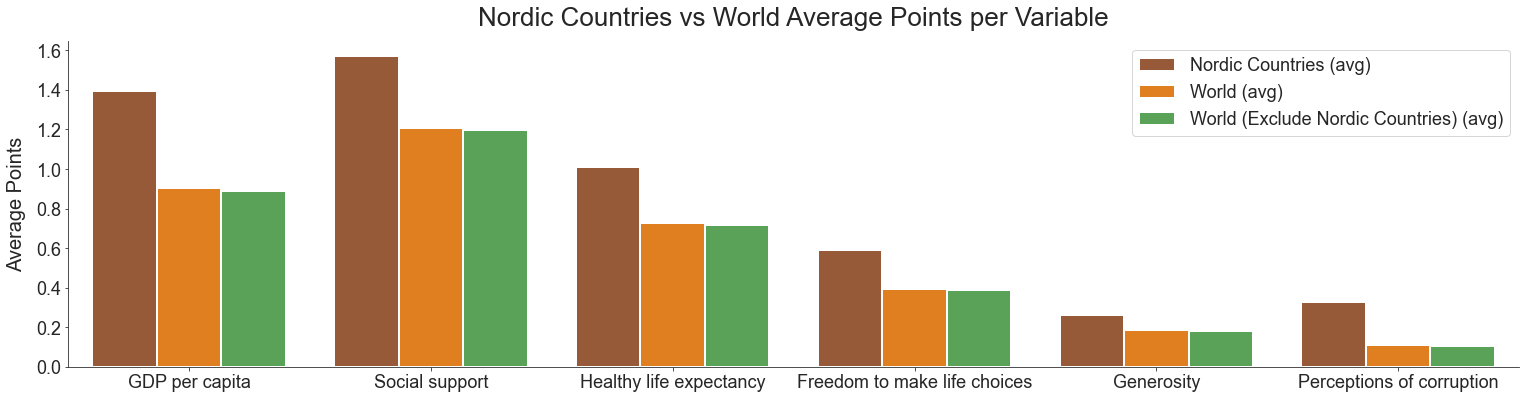

In [46]:
plt.figure(figsize = (26, 6)) # Set the figure width and height

# Bar chart showing overall average Nordic countries and the world
ax = sns.barplot(x="variable", y="value", hue="Country or region", data=df_avg, 
                 palette='Set1_r',  edgecolor="white", linewidth=2)
# Set the chart style
sns.set_style("ticks")
sns.despine()

# Set the title, the labels, the legend, and custom ticks
plt.title("Nordic Countries vs World Average Points per Variable", fontsize = 26, pad=15)
ax.set_xlabel("")
ax.set_ylabel("Average Points", fontsize=20, labelpad=10)
ax.tick_params(labelsize=18)
ax.legend(fontsize=18)
# Show the plot
plt.show()

The Nordic countries have greater average points in every index variable. After all, they dominated the happiness world ranking and must have greater points than the rest of the country. From this graph, the difference between the average `generosity` points of Nordics and the world is relatively small, which is **(0.05)** points. This could be because `generosity` has the weakest correlation with the happiness score, so this variable does not help much with Nordic countries' happiness. Or, because the `generosity` in the Nordic countries is indeed low, after all, only **Iceland** has high points in this variable.

#### HAPPINESS LEVEL BY COUNTRY MAP

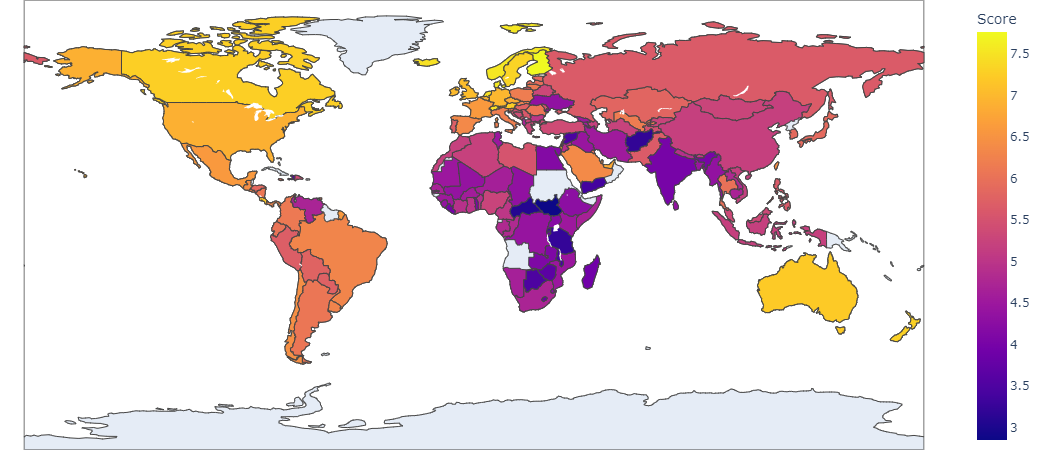

In [81]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(happiness, locations='Country or region',
                    locationmode = "country names",
                    color="Score",
                    hover_name = 'Country or region',
                    hover_data={'Country or region':False,
                                'Overall rank': True
                               }
                   )
fig.update_layout(width=960, height=450, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We can see how the Nordic countries compared to other countries in terms of happiness scores. Also, how the countries in Africa and Southern Asia, or the Global South, have overall lower happiness scores.

---
## CONCLUSION

Everybody looks at happiness in different ways, but through the World Happiness Report, we can clearly see some variables that played an important role to determine its scale. Through this kind of report, people can see how each year a country is handling to create a more liveable country for its citizen. [Countries](https://www.globalcitizen.org/en/content/happiest-and-unhappiest-countries-2022/) with already high GDP for example, are more focused more on human well-being factors to raise their happiness level, like the Nordic countries for example. Meanwhile, other countries still focusing on how to fulfill the basic needs of their people.